In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Space Server.csv")
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
df.shape

(10000, 18)

In [4]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [7]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [8]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [9]:
#Let's check if there are any question marks in our data
for i in df.columns:
    print(i,df[i].unique())

objid [1.23765e+18]
ra [183.5313257 183.5983705 183.6802074 ... 131.5525623 131.4771511
 131.6650121]
dec [ 0.08969303  0.13528503  0.12618509 ... 51.66698638 51.75306779
 51.80530747]
u [19.47406 18.6628  19.38298 ... 18.75818 18.88287 19.27586]
g [17.0424  17.21449 18.19169 ... 17.77784 17.91068 17.37829]
r [15.94699 16.67637 17.47428 ... 17.51872 17.53152 16.30542]
i [15.50342 16.48922 17.08732 ... 17.43302 17.36284 15.83548]
z [15.22531 16.3915  16.80125 ... 17.42048 17.13988 15.50588]
run [ 752  756  308  727  745 1035 1045 1140 1231 1332 1334 1302 1239 1119
 1331 1345 1350 1404 1412 1336 1402 1411 1356]
rerun [301]
camcol [4 2 1 5 6 3]
field [267 268 269 270 271 272 273 274 275 276 277 278 279 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 502 503
 504 505 506 508 509 510 511 512 515 516 517 518 519 520 521 522 104 105
 110 111 112 113 114 115 116  25  26  28  29  90  91  92  93  95  74  70
  71  66 103 538 539 567 568 571 573 575 576 579 580

In [12]:
df_cor=df.corr()

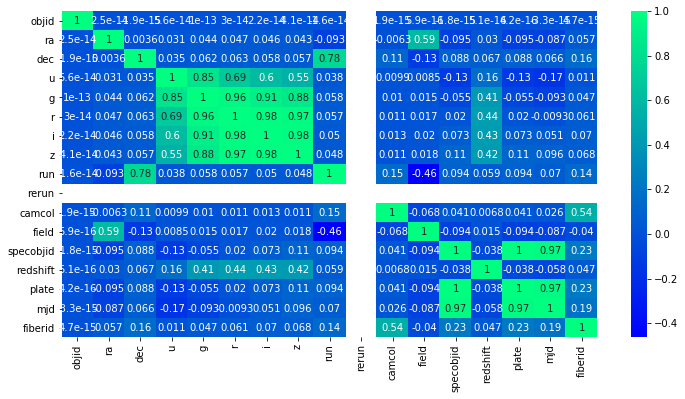

In [17]:
#Let's check correlation on a heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df_cor,annot=True,cmap="winter")

Text(0.5, 1.0, 'Correlation with Targt Variable')

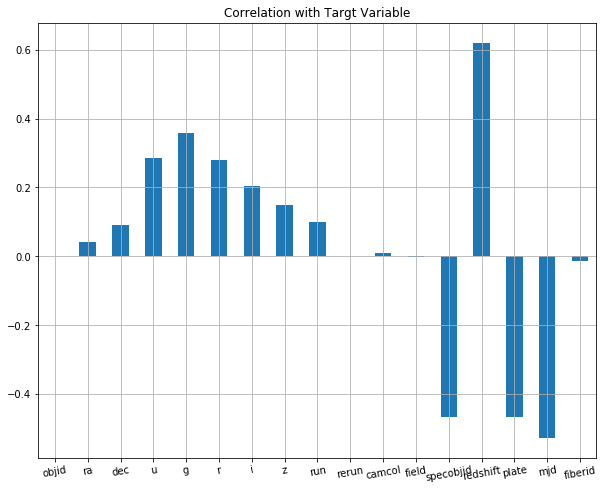

In [25]:
plt.figure(figsize=(10,8))
df.drop("class",axis=1).corrwith(df["class"]).plot(kind="bar",grid=True)
plt.xticks(rotation=10)
plt.title("Correlation with Targt Variable")

In [15]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [18]:
#Let's change the datatype of our target column
df["class"]=df["class"].map({"STAR":0,"GALAXY":1,"QSO":2})

In [19]:
#Let's check the datatype of our target column now
df["class"].dtypes

dtype('int64')

In [20]:
#Checking the unique values
df["class"].unique()

array([0, 1, 2], dtype=int64)

Univariate Analysis

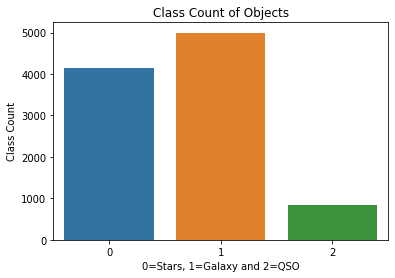

In [30]:
#Checking count of Classes
plt.figure(figsize=(6,4))
sns.countplot(x="class",data=df)
plt.title("Class Count of Objects")
plt.xlabel("0=Stars, 1=Galaxy and 2=QSO")
plt.ylabel("Class Count")
plt.show()

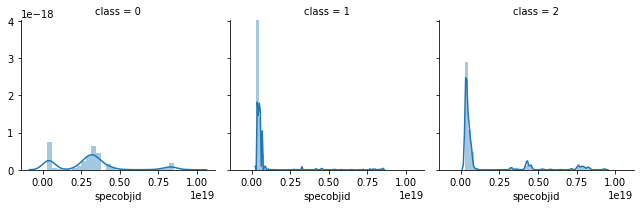

In [42]:
facet=sns.FacetGrid(df,col="class")
facet.map(sns.distplot,"specobjid")
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'x_label'

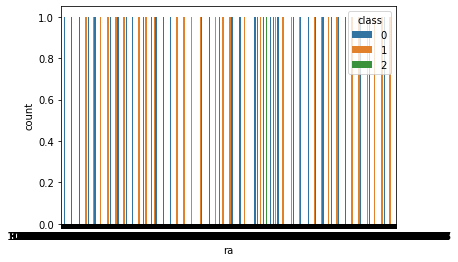

In [75]:
#ra vs. class
sns.countplot(x="ra",hue="class",data=df)
plt.x_label("ra")
plt.ylabel("Class")
plt.show()

In [ ]:
sns.pairplot(df,hue="class")

In [48]:
#Let's check skewneww
df.skew()

objid        0.000000
ra          -1.227350
dec          0.152301
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
rerun        0.000000
camcol      -0.100220
field        0.249795
specobjid    0.696181
class        0.381391
redshift     3.513844
plate        0.696680
mjd          1.011097
fiberid      0.308053
dtype: float64

In [49]:
#Let's treat the skewness
for i in df.columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [50]:
df.skew()

objid        0.000000
ra          -1.227350
dec          0.152301
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
rerun        0.000000
camcol      -0.100220
field        0.249795
specobjid    0.682889
class        0.381391
redshift     3.142088
plate        0.629176
mjd          1.008762
fiberid      0.308053
dtype: float64

In [55]:
#Let's check for outliers
from scipy.stats import zscore
z_score=np.abs(zscore(df))
print(np.where(z_score>3))

(array([  17,   45,  109, ..., 9929, 9940, 9956], dtype=int64), array([14, 14, 14, ...,  3, 14, 14], dtype=int64))


In [58]:
df_final=df[(z_score<3).all(axis=1)]

In [60]:
df.shape

(10000, 18)

In [61]:
df_final.shape

(0, 18)

In [62]:
#Model Training
#Splitting Data into input and output variable
x=df.drop(columns=["class"],axis=1)
x.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,41.659746,183.531326,0.085896,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.778740,-0.000009,2.208692,2.477688,491
1,41.659746,183.598371,0.126884,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.724136,-0.000055,1.914087,2.472462,541
2,41.659746,183.680207,0.118836,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.721281,0.109843,1.896564,2.473126,513
3,41.659746,183.870529,0.048705,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.778741,-0.000111,2.208692,2.477688,510
4,41.659746,183.883288,0.097632,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.778741,0.000590,2.208692,2.477688,512


In [63]:
y=df["class"]
y.head()

0    0
1    0
2    1
3    0
4    0
Name: class, dtype: int64

In [65]:
#Checking the shape of input and output variable
x.shape

(10000, 17)

In [66]:
y.shape

(10000,)

In [67]:
#Scaling input variable
from sklearn.preprocessing import StandardScaler
StdScl=StandardScaler()
x=StdScl.fit_transform(x)

In [70]:
#Splitting data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [71]:
#Checking shape
x_train.shape

(8000, 17)

In [72]:
x_test.shape

(2000, 17)

In [73]:
y_train.shape

(8000,)

In [74]:
y_test.shape

(2000,)

In [77]:
#Importing Model libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#Importing Boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
#Importing Error Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score

In [79]:
model=[GaussianNB(),SVC(),DecisionTreeClassifier,KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy score of ", m)
    print(accuracy_score*y_test,predm)
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("\n")

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [80]:
#NOt sure how to fix this error. I already checked for nan values